In [5]:
!jupyter nbconvert --to html /content/DAV_Portfolio-1.ipynb

[NbConvertApp] Converting notebook /content/Business_Case_Fintech.ipynb to html
[NbConvertApp] Writing 1313315 bytes to /content/Business_Case_Fintech.html


**Problem Statement:**

In the fast-evolving banking sector, customer retention is crucial. This project aims to analyze a dataset of bank customers to identify key predictors of churn. By leveraging data analytics, we will uncover patterns and insights to enhance customer retention strategies and reduce churn rates.

In [6]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, f_oneway, ttest_ind, shapiro, levene, kruskal

In [7]:
data_path = 'Bank-Records.csv'
df = pd.read_csv(data_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 10000
Number of columns: 18


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [10]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


In [11]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
# Dropping unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Converting columns to appropriate data types
df['Geography'] = df['Geography'].astype('category')
df['Tenure'] = df['Tenure'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Card Type'] = df['Card Type'].astype('category')
df['HasCrCard'] = df['Card Type'].astype('category')
df['IsActiveMember'] = df['IsActiveMember'].astype('category')
df['Complain'] = df['Complain'].astype('category')
df['Satisfaction Score'] = df['Complain'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CreditScore         10000 non-null  int64   
 1   Geography           10000 non-null  category
 2   Gender              10000 non-null  category
 3   Age                 10000 non-null  int64   
 4   Tenure              10000 non-null  category
 5   Balance             10000 non-null  float64 
 6   NumOfProducts       10000 non-null  int64   
 7   HasCrCard           10000 non-null  category
 8   IsActiveMember      10000 non-null  category
 9   EstimatedSalary     10000 non-null  float64 
 10  Exited              10000 non-null  int64   
 11  Complain            10000 non-null  category
 12  Satisfaction Score  10000 non-null  category
 13  Card Type           10000 non-null  category
 14  Point Earned        10000 non-null  int64   
dtypes: category(8), float64(2), int64(5)


In [14]:
cat_cols = df.dtypes == 'category'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['Geography',
 'Gender',
 'Tenure',
 'HasCrCard',
 'IsActiveMember',
 'Complain',
 'Satisfaction Score',
 'Card Type']

In [15]:
num_cols = df.dtypes != 'category'
num_cols = list(num_cols[num_cols].index)
num_cols.remove('Exited')
num_cols

['CreditScore',
 'Age',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Point Earned']

In [16]:
target = 'Exited'

**Observations:**

* Datatypes of the attributes changed to proper data type used for analysis:
  *  Categorical Columns: Geography, Gender, Tenure, HasCrCard, IsActiveMember, Complain, Satisfaction Score, Card Type
  * Numerical Columns: CreditScore, Age, Balance, NumOfProducts, EstimatedSalary, Point Earned

* Removed unnecessary columns which are not used for analysis.

* There are no missing values or duplicates in the data.

**Descriptive Statistics**
  * Basic Statistics: Calculate mean, median, and mode for numerical columns like CreditScore, Age, Balance, NumOfProducts, EstimatedSalary, and Points Earned.
  * Distribution Analysis: Analyze the distribution of key numerical variables using histograms and box plots to understand the spread and central tendency.

In [17]:
# Basic Statistics
df[num_cols].describe()

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,1.530200,100090.239881,606.515100
std,96.653299,10.487806,62397.405202,0.581654,57510.492818,225.924839
min,350.000000,18.000000,0.000000,1.000000,11.580000,119.000000
25%,584.000000,32.000000,0.000000,1.000000,51002.110000,410.000000
50%,652.000000,37.000000,97198.540000,1.000000,100193.915000,605.000000
75%,718.000000,44.000000,127644.240000,2.000000,149388.247500,801.000000
max,850.000000,92.000000,250898.090000,4.000000,199992.480000,1000.000000


In [18]:
for col in cat_cols:
    print(f"{col} : \n{df[col].value_counts()}\n")

Geography : 
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender : 
Gender
Male      5457
Female    4543
Name: count, dtype: int64

Tenure : 
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

HasCrCard : 
HasCrCard
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

IsActiveMember : 
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

Complain : 
Complain
0    7956
1    2044
Name: count, dtype: int64

Satisfaction Score : 
Satisfaction Score
0    7956
1    2044
Name: count, dtype: int64

Card Type : 
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64



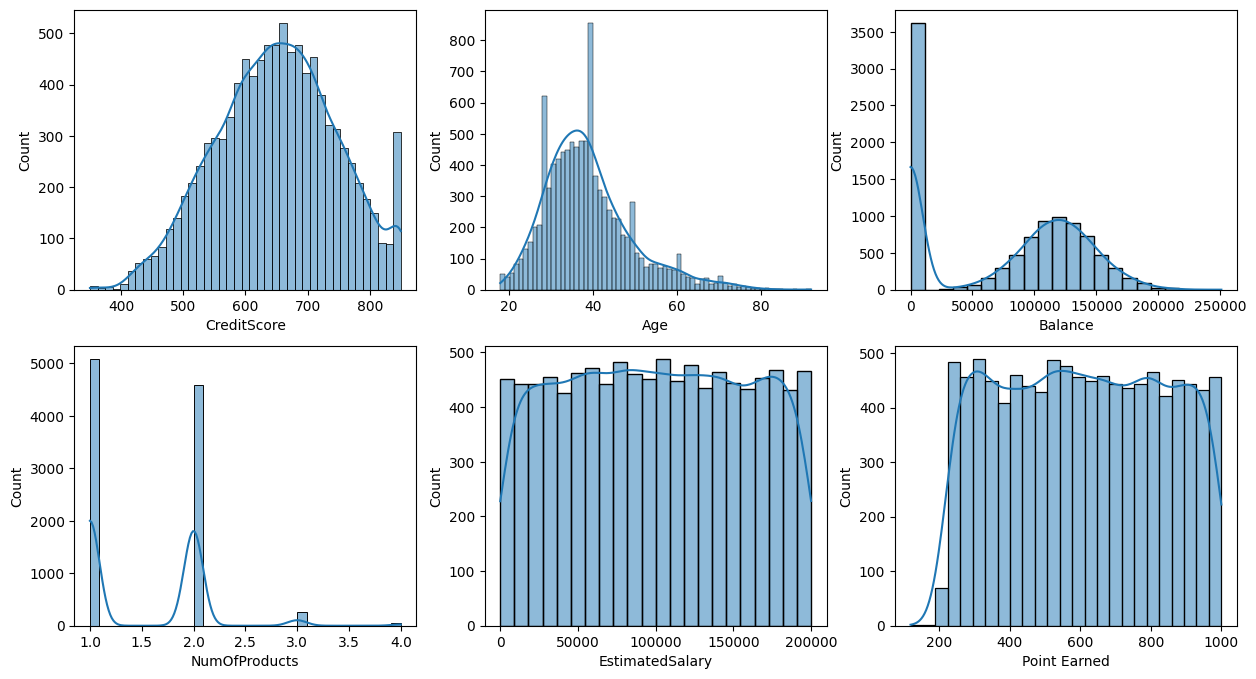

In [19]:
# Distribution Analysis:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()

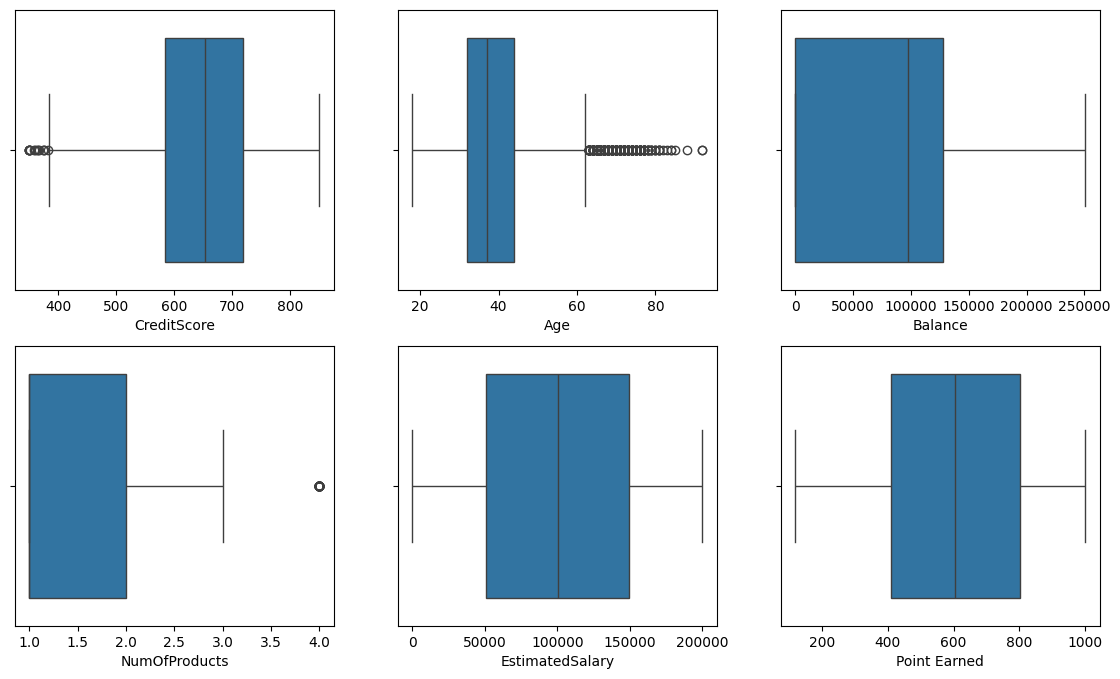

In [20]:
# Box plots for numerical columns
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1

plt.show()

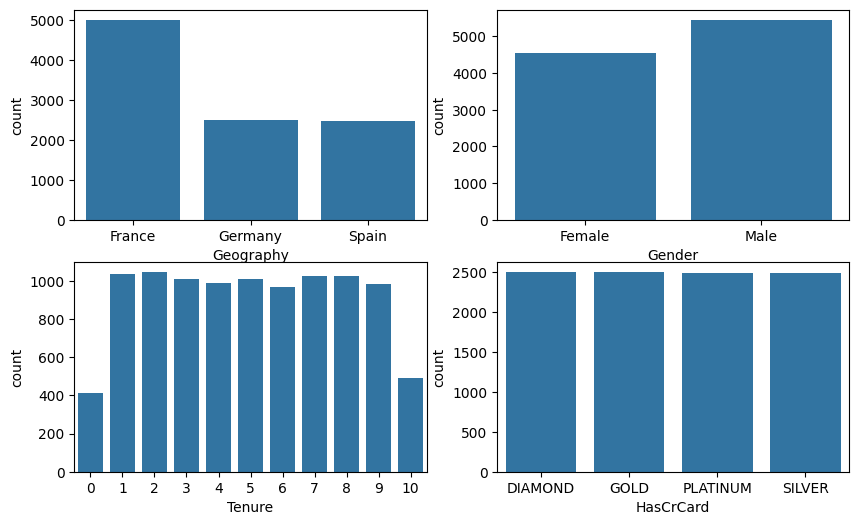

In [21]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1

plt.show()

**Exploratory Data Analysis (EDA)**
  * Correlation Analysis: Explore the correlation between numerical features and the Exited variable to identify potential predictors of churn.
  * Customer Profile Analysis: Segment customers based on key demographics (Age, Geography, Gender) to identify which groups are more likely to churn.

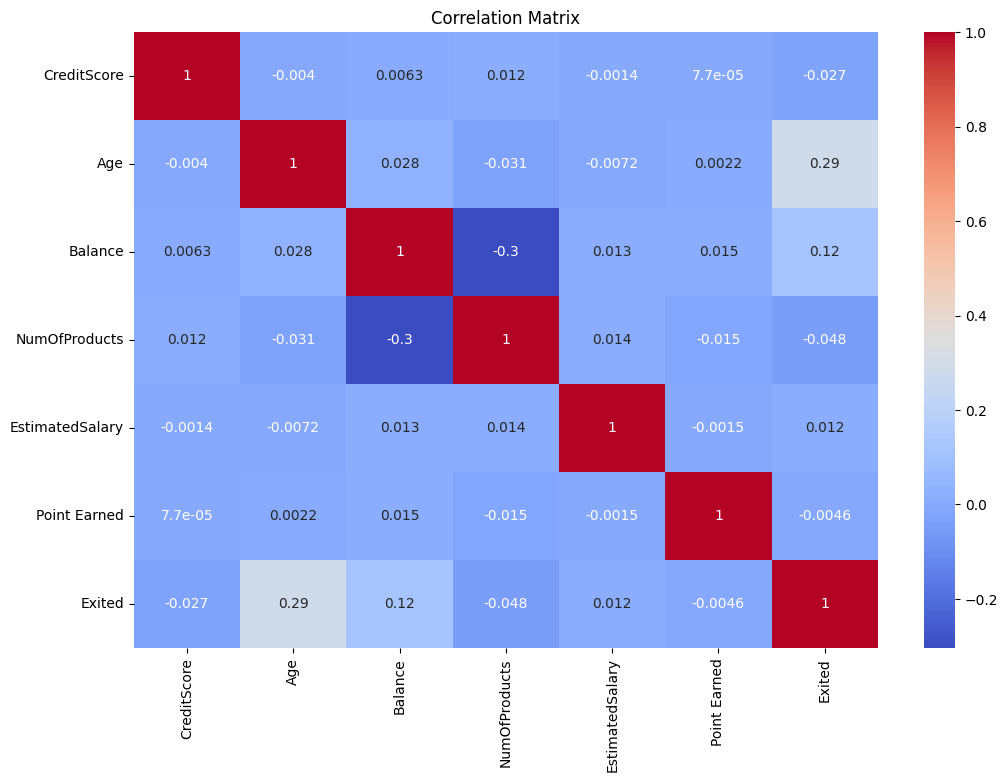

In [22]:
#Correlation Analysis

# Correlation matrix
corr_matrix = df[num_cols + [target]].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


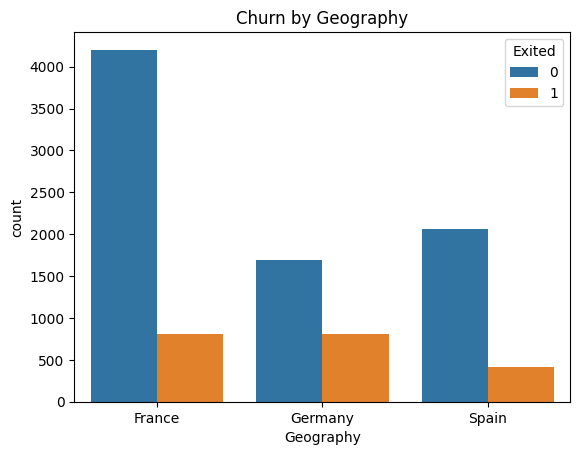

In [23]:
# Customer Profile Analysis

# Churn by Geography
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn by Geography')
plt.show()

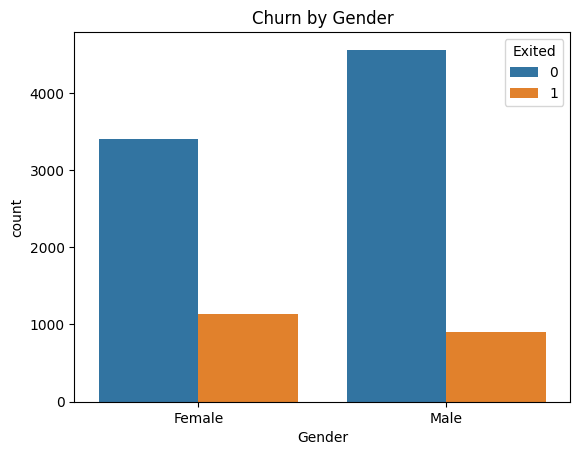

In [24]:
# Churn by Gender
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn by Gender')
plt.show()

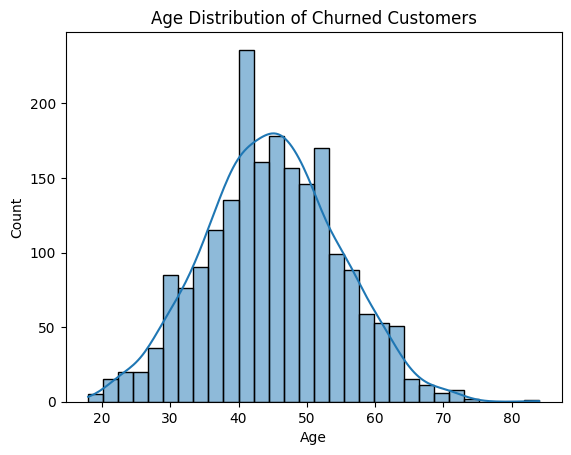

In [25]:
# Churn by Age
sns.histplot(df[df['Exited'] == 1]['Age'], bins=30, kde=True)
plt.title('Age Distribution of Churned Customers')
plt.show()

**Comparative Analysis**
  * Churn by Geography: Compare churn rates across different geographical locations to see if certain regions have higher churn rates.
  * Gender Differences in Churn: Analyze churn rates between different genders to explore if gender plays a significant role in churn.

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


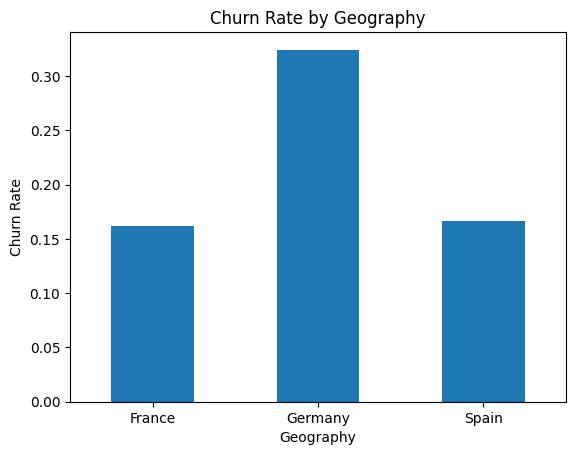

In [26]:
# Comparative Analysis:

# Churn by Geography
geography_churn = df.groupby('Geography')['Exited'].mean()
print(geography_churn)

geography_churn.plot(kind='bar', title='Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()


Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64


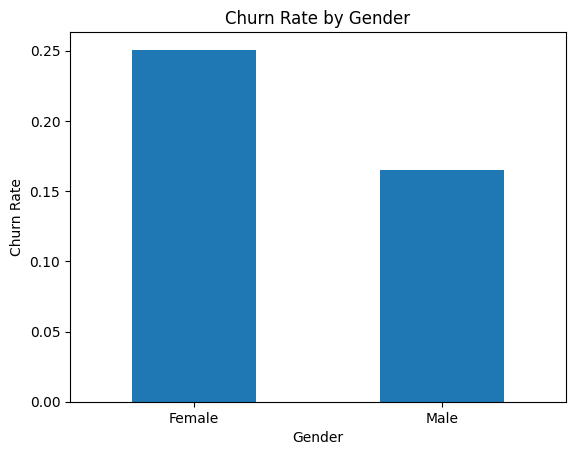

In [27]:
# Gender differences in Churn
gender_churn = df.groupby('Gender')[target].mean()
print(gender_churn)

gender_churn.plot(kind='bar', title='Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()


**Behavioral Analysis**
  * Product and Services Usage: Examine how the number of products (NumOfProducts) a customer uses affects their likelihood to churn.
  * Activity Level Analysis: Investigate the relationship between being an IsActiveMember and customer churn.

NumOfProducts
1    0.277144
2    0.076035
3    0.827068
4    1.000000
Name: Exited, dtype: float64


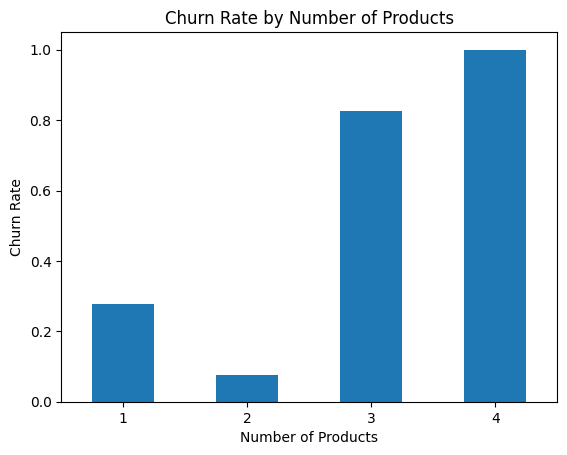

In [28]:
# Behavioural Analysis

# Product and Services Usage
products_churn = df.groupby('NumOfProducts')[target].mean()
print(products_churn)

products_churn.plot(kind='bar', title='Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

IsActiveMember
0    0.268715
1    0.142691
Name: Exited, dtype: float64


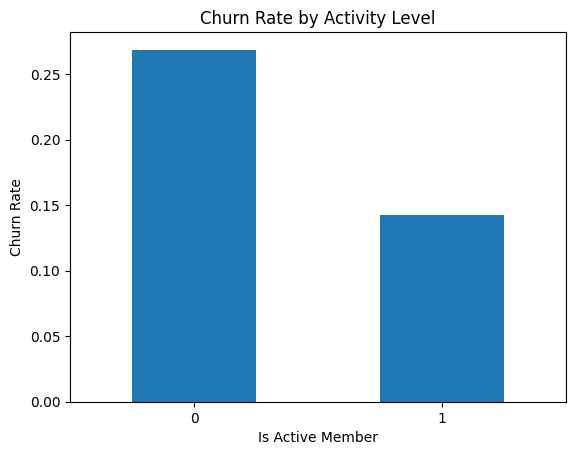

In [29]:
# Activity Level Analysis
activity_churn = df.groupby('IsActiveMember')[target].mean()
print(activity_churn)

activity_churn.plot(kind='bar', title='Churn Rate by Activity Level')
plt.xlabel('Is Active Member')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()


**Financial Analysis**
  * Balance vs. Churn: Analyze how customer balance levels correlate with churn rates.
  * Credit Card Ownership: Determine if owning a credit card (HasCrCard) impacts customer loyalty.

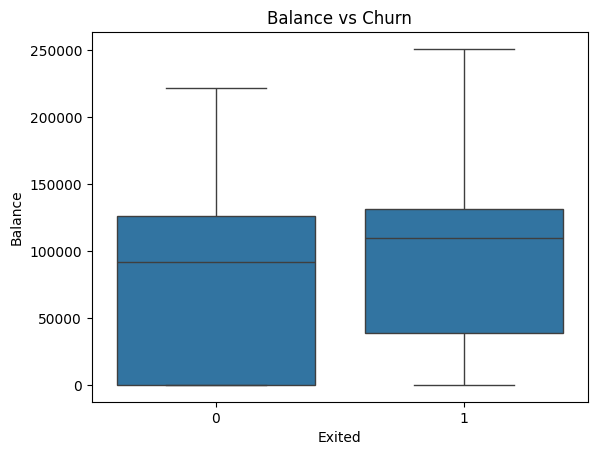

In [30]:
# Financial Analysis

# Balance vs. Churn
sns.boxplot(x=target, y='Balance', data=df)
plt.title('Balance vs Churn')
plt.show()


HasCrCard
DIAMOND     0.217790
GOLD        0.192646
PLATINUM    0.203607
SILVER      0.201122
Name: Exited, dtype: float64


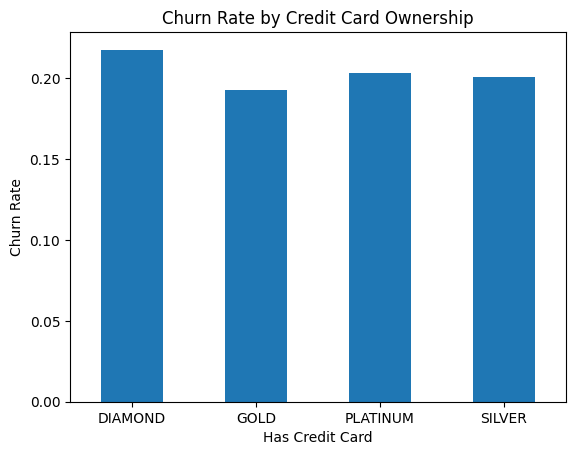

In [31]:
# Credit Card Ownership
card_churn = df.groupby('HasCrCard')[target].mean()
print(card_churn)

card_churn.plot(kind='bar', title='Churn Rate by Credit Card Ownership')
plt.xlabel('Has Credit Card')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()


**Customer Satisfaction and Feedback**
  * Complaint Analysis: Study the impact of having a complaint (Complain) on customer churn.
  * Satisfaction and Churn: Explore how the Satisfaction Score relates to churn, especially among those who have filed complaints.

Complain
0    0.000503
1    0.995108
Name: Exited, dtype: float64


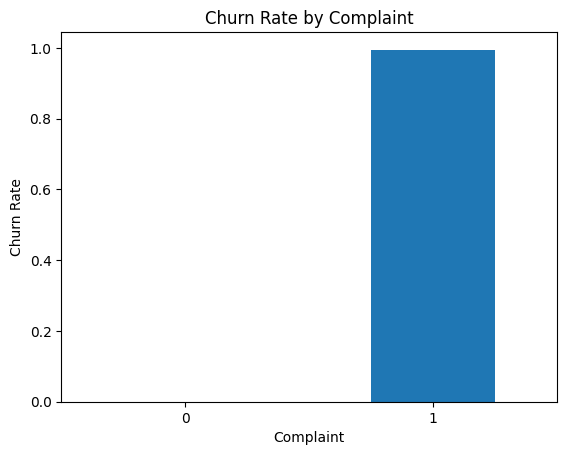

In [32]:
# Customer Satisfaction and Feedback

# Complaint Analysis
complain_churn = df.groupby('Complain')[target].mean()
print(complain_churn)

complain_churn.plot(kind='bar', title='Churn Rate by Complaint')
plt.xlabel('Complaint')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()


Satisfaction Score
0    0.000503
1    0.995108
Name: Exited, dtype: float64


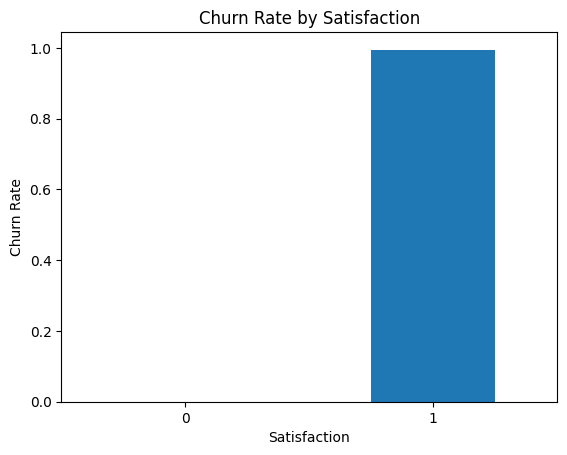

In [33]:
# Satisfaction Analysis
satisfaction_churn = df.groupby('Satisfaction Score')[target].mean()
print(satisfaction_churn)

satisfaction_churn.plot(kind='bar', title='Churn Rate by Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

**Card Usage Analysis**
  * Impact of Card Type on Churn: Examine if different Card Types have different churn rates.
  * Loyalty Points Analysis: Investigate whether Points Earned from credit card usage influence customer retention.

Card Type
DIAMOND     0.217790
GOLD        0.192646
PLATINUM    0.203607
SILVER      0.201122
Name: Exited, dtype: float64


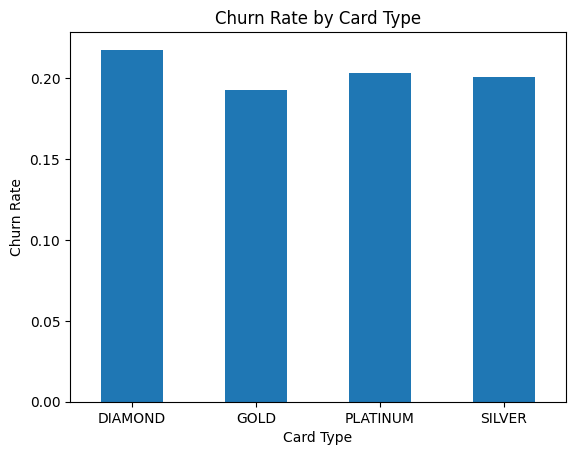

In [34]:
# Card Usage Analysis
card_type_churn = df.groupby('Card Type')[target].mean()
print(card_type_churn)

card_type_churn.plot(kind='bar', title='Churn Rate by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()


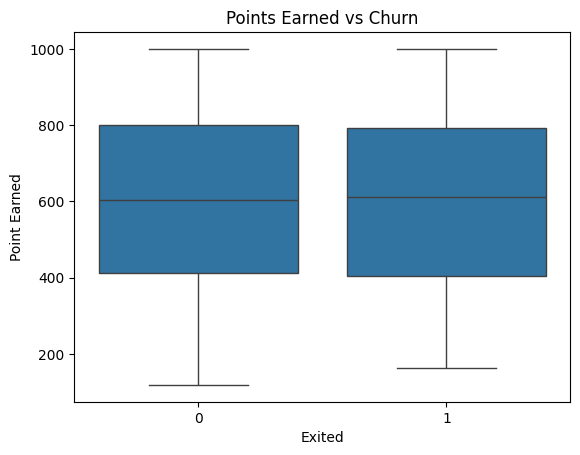

In [35]:
# Loyalty Points Analysis
sns.boxplot(x=target, y='Point Earned', data=df)
plt.title('Points Earned vs Churn')
plt.show()


**Salary Analysis**
  * Salary and Churn: Analyze the relationship between EstimatedSalary and customer churn, focusing on how financial well-being might influence churn decisions.

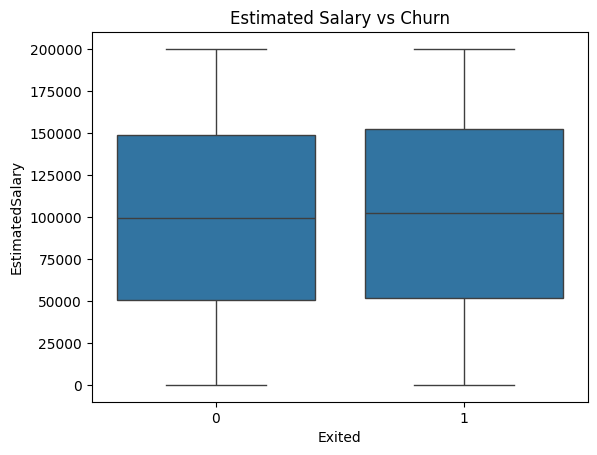

In [36]:
# Salary Analysis
sns.boxplot(x=target, y='EstimatedSalary', data=df)
plt.title('Estimated Salary vs Churn')
plt.show()


In [37]:
# Chi-Square Test for Independence (Categorical Variables)
def chi2_test(cat_col):
    contingency_table = pd.crosstab(df[cat_col], df[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f'Chi2 Test for {cat_col}: p-value = {p}')

# Applying Chi-Square test for each categorical column
for col in cat_cols:
    chi2_test(col)


Chi2 Test for Geography: p-value = 5.245736109572763e-66
Chi2 Test for Gender: p-value = 2.9253677618642e-26
Chi2 Test for Tenure: p-value = 0.17035079254617927
Chi2 Test for HasCrCard: p-value = 0.16794112067810177
Chi2 Test for IsActiveMember: p-value = 6.153167438113408e-55
Chi2 Test for Complain: p-value = 0.0
Chi2 Test for Satisfaction Score: p-value = 0.0
Chi2 Test for Card Type: p-value = 0.16794112067810177


1. **Geography**
   - **Null Hypothesis (\(H_0\))**: There is no significant association between Geography and customer churn (Exited).
   - **Alternate Hypothesis (\(H_a\))**: There is a significant association between Geography and customer churn (Exited).
   - **p-value**: \(5.245736109572763 \times 10^{-66}\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant association between Geography and customer churn.

2. **Gender**
   - **Null Hypothesis (\(H_0\))**: There is no significant association between Gender and customer churn (Exited).
   - **Alternate Hypothesis (\(H_a\))**: There is a significant association between Gender and customer churn (Exited).
   - **p-value**: \(2.9253677618642 \times 10^{-26}\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant association between Gender and customer churn.

3. **Tenure**
   - **Null Hypothesis (\(H_0\))**: There is no significant association between Tenure and customer churn (Exited).
   - **Alternate Hypothesis (\(H_a\))**: There is a significant association between Tenure and customer churn (Exited).
   - **p-value**: \(0.17035079254617927\)
   - **Conclusion**: Since the p-value is greater than 0.05, we accept the null hypothesis. There is no significant association between Tenure and customer churn.

4. **HasCrCard**
   - **Null Hypothesis (\(H_0\))**: There is no significant association between HasCrCard and customer churn (Exited).
   - **Alternate Hypothesis (\(H_a\))**: There is a significant association between HasCrCard and customer churn (Exited).
   - **p-value**: \(0.16794112067810177\)
   - **Conclusion**: Since the p-value is greater than 0.05, we accept the null hypothesis. There is no significant association between HasCrCard and customer churn.

5. **IsActiveMember**
   - **Null Hypothesis (\(H_0\))**: There is no significant association between IsActiveMember and customer churn (Exited).
   - **Alternate Hypothesis (\(H_a\))**: There is a significant association between IsActiveMember and customer churn (Exited).
   - **p-value**: \(6.153167438113408 \times 10^{-55}\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant association between IsActiveMember and customer churn.

6. **Complain**
   - **Null Hypothesis (\(H_0\))**: There is no significant association between Complain and customer churn (Exited).
   - **Alternate Hypothesis (\(H_a\))**: There is a significant association between Complain and customer churn (Exited).
   - **p-value**: \(0.0\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant association between Complain and customer churn.

7. **Satisfaction Score**
   - **Null Hypothesis (\(H_0\))**: There is no significant association between Satisfaction Score and customer churn (Exited).
   - **Alternate Hypothesis (\(H_a\))**: There is a significant association between Satisfaction Score and customer churn (Exited).
   - **p-value**: \(0.0\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant association between Satisfaction Score and customer churn.

8. **Card Type**
   - **Null Hypothesis (\(H_0\))**: There is no significant association between Card Type and customer churn (Exited).
   - **Alternate Hypothesis (\(H_a\))**: There is a significant association between Card Type and customer churn (Exited).
   - **p-value**: \(0.16794112067810177\)
   - **Conclusion**: Since the p-value is greater than 0.05, we accept the null hypothesis. There is no significant association between Card Type and customer churn.

**Summary of Conclusions:**

- **Significant Association**: Geography, Gender, IsActiveMember, Complain, Satisfaction Score
- **No Significant Association**: Tenure, HasCrCard, Card Type

In [38]:
# ANOVA (Analysis of Variance) for Numerical Variables
def anova_test(num_col):
    churned = df[df[target] == 1][num_col]
    not_churned = df[df[target] == 0][num_col]
    f_stat, p_val = f_oneway(churned, not_churned)
    print(f'ANOVA Test for {num_col}: p-value = {p_val}')

# Applying ANOVA test for each numerical column
for col in num_cols:
    anova_test(col)

ANOVA Test for CreditScore: p-value = 0.007422037242745041
ANOVA Test for Age: p-value = 1.3467162476217312e-186
ANOVA Test for Balance: p-value = 1.2092076077172668e-32
ANOVA Test for NumOfProducts: p-value = 1.9057769904620855e-06
ANOVA Test for EstimatedSalary: p-value = 0.21171461351515153
ANOVA Test for Point Earned: p-value = 0.6435350184289543


1. **CreditScore**
   - **Null Hypothesis (\(H_0\))**: The mean CreditScore is the same for both churned and non-churned customers.
   - **Alternate Hypothesis (\(H_a\))**: The mean CreditScore is different for churned and non-churned customers.
   - **p-value**: \(0.007422037242745041\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant difference in CreditScore between churned and non-churned customers.

2. **Age**
   - **Null Hypothesis (\(H_0\))**: The mean Age is the same for both churned and non-churned customers.
   - **Alternate Hypothesis (\(H_a\))**: The mean Age is different for churned and non-churned customers.
   - **p-value**: \(1.3467162476217312 \times 10^{-186}\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant difference in Age between churned and non-churned customers.

3. **Balance**
   - **Null Hypothesis (\(H_0\))**: The mean Balance is the same for both churned and non-churned customers.
   - **Alternate Hypothesis (\(H_a\))**: The mean Balance is different for churned and non-churned customers.
   - **p-value**: \(1.2092076077172668 \times 10^{-32}\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant difference in Balance between churned and non-churned customers.

4. **NumOfProducts**
   - **Null Hypothesis (\(H_0\))**: The mean NumOfProducts is the same for both churned and non-churned customers.
   - **Alternate Hypothesis (\(H_a\))**: The mean NumOfProducts is different for churned and non-churned customers.
   - **p-value**: \(1.9057769904620855 \times 10^{-6}\)
   - **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant difference in NumOfProducts between churned and non-churned customers.

5. **EstimatedSalary**
   - **Null Hypothesis (\(H_0\))**: The mean EstimatedSalary is the same for both churned and non-churned customers.
   - **Alternate Hypothesis (\(H_a\))**: The mean EstimatedSalary is different for churned and non-churned customers.
   - **p-value**: \(0.21171461351515153\)
   - **Conclusion**: Since the p-value is greater than 0.05, we accept the null hypothesis. There is no significant difference in EstimatedSalary between churned and non-churned customers.

6. **Point Earned**
   - **Null Hypothesis (\(H_0\))**: The mean Point Earned is the same for both churned and non-churned customers.
   - **Alternate Hypothesis (\(H_a\))**: The mean Point Earned is different for churned and non-churned customers.
   - **p-value**: \(0.6435350184289543\)
   - **Conclusion**: Since the p-value is greater than 0.05, we accept the null hypothesis. There is no significant difference in Point Earned between churned and non-churned customers.

**Summary of Conclusions:**
- **Significant Difference**: CreditScore, Age, Balance, NumOfProducts
- **No Significant Difference**: EstimatedSalary, Point Earned

**Insights and Recommendations**

After conducting the above analyses, we can summarize the key insights and provide recommendations:

1. **Geography**: Regions with higher churn rates can be targeted with localized retention strategies.
2. **Gender**: Gender differences in churn can inform targeted marketing and retention campaigns.
3. **Number of Products**: Customers with fewer products are more likely to churn, suggesting that encouraging customers to use more products might reduce churn.
4. **Activity Level**: Inactive members are more likely to churn, indicating the need to engage these customers more effectively.
5. **Balance**: Customers with lower balances tend to churn more, suggesting financial well-being programs might help retain these customers.
6. **Credit Card Ownership**: Customers without a credit card are more likely to churn, indicating potential for upselling credit card products.
7. **Complaints**: Customers who have filed complaints are more likely to churn, highlighting the importance of addressing customer grievances promptly and effectively.
8. **Satisfaction Score**: Lower satisfaction scores are associated with higher churn, underscoring the need for continuous improvement in customer satisfaction.

**Recommendations**

1. **Targeted Retention Campaigns**: Develop region-specific strategies to address the unique needs of customers in high-churn areas.
2. **Engagement Programs**: Increase engagement with inactive members through personalized communications and offers.
3. **Product Upselling**: Encourage customers to use multiple products by offering bundled services and incentives.
4. **Customer Support**: Enhance customer support and grievance resolution processes to improve satisfaction and reduce churn.
5. **Financial Well-being Programs**: Offer financial planning and advisory services to customers with lower balances to help them manage their finances better.

By implementing these recommendations, banks can improve customer retention and reduce churn rates effectively.